# BASIC composite merging tutorial

## In this quick tutorial we'll load in some composite time-series, pass them through the BASIC algorithm, yielding a "super-merged" composite

## Start by importing required libraries

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import netCDF4
import basic

## Let's import some composites to run the BASIC merging algorithm on...

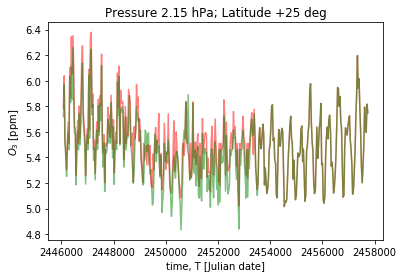

In [2]:
# Import the data
data = netCDF4.Dataset('data/hmc_2016_lotus_seascyc_sgo3_fac2.nc')
T = data["time"][:]
P = data["pressure"][:]
L = data["latitude"][:]

# Which pressure and latitude index do you want to analyze?
pressure = 22
latitude = 8

# List of data vectors for input to HMC
d = [data['comp_mean'][latitude, pressure, :, 0], data['comp_mean'][latitude, pressure, :, 1]]

# Let's plot the data to see how it looks

# Plot the selected data and error bars
plt.title('Pressure {:.2f} hPa; Latitude {:+.0f} deg'.format(P[pressure], L[latitude]))
plt.plot(T, data['comp_mean'][latitude, pressure, :, 0], color = 'red', alpha=0.5)
plt.plot(T, data['comp_mean'][latitude, pressure, :, 1], color = 'green', alpha=0.5)
plt.xlabel('time, T [Julian date]')
plt.ylabel(r'$O_3$ [ppm]')
plt.show()

## Now we need to construct the seasonal transition prior and SVD errors

## NB to Will: do your stuff here re SVD and transition priors, we need to read in an array of where to puff up the errors, right? And declare a constant for what factor to puff them up by?

## NB to Will: once you've written code to do the SVD errors and transition priors here, I'll put it all inside the function `run_basic_sampler()` below so the whole code is literally just one function and none of your stuff will appear "on the outside"

In [3]:
# Construct seasonal cycle prior
transition_prior = [data["anncyc_mean"][latitude, pressure, :], data["anncyc_std"][latitude, pressure, :]]

# Construct SVD errors
s = [data['comp_std'][latitude, pressure, :, 0], data['comp_std'][latitude, pressure, :, 1]]

## Run the HMC sampler

## NB to Will: once the SVD and transition prior construction bits are done, this will be the ONLY function that gets executed: it will take in the composites, an array of where to puff up the error bars and then do everything in one go

In [4]:
# Run the HMC sampler
samples = basic.run_basic_sampler(d, s, transition_prior, gamma=100, beta=0.5)

INFO:pystan:COMPILING THE C++ CODE FOR MODEL anon_model_d00319da3b6a86f0a889f18e63633976 NOW.
/usr/local/lib/python3.6/site-packages/Cython/Compiler/Main.py:367: FutureWarning: Cython directive 'language_level' not set, using 2 for now (Py2). This will change in a later release! File: /var/folders/zy/hj602m6n0w19_z63287bdt5w0000gn/T/tmp319vjo4o/stanfit4anon_model_d00319da3b6a86f0a889f18e63633976_9210812482129098774.pyx
  tree = Parsing.p_module(s, pxd, full_module_name)


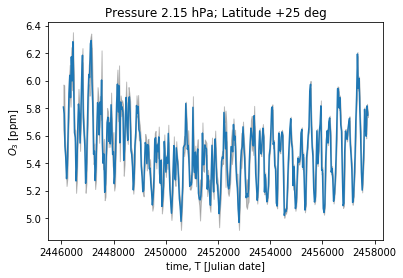

In [16]:
# Let's plot the output (posterior mean and standard deviation)

# Posterior mean and std-deviation
mean = np.mean(samples, axis=0)
std = np.std(samples, axis=0)

# Plot the mean and std-dev
plt.title('Pressure {:.2f} hPa; Latitude {:+.0f} deg'.format(P[pressure], L[latitude]))
plt.xlabel('time, T [Julian date]')
plt.ylabel(r'$O_3$ [ppm]')
plt.plot(T, np.mean(samples, axis=0))
plt.fill_between(T, mean - std, mean + std, color = 'grey', alpha = 0.5)
plt.show()